In [94]:
import numpy as np
import pandas as pd
import json
import requests
import re
import os
from datetime import datetime as dt
from pandas.io.json import json_normalize
import geocoder
import matplotlib.pylab as plt
import seaborn as sns
import shapefile
from scipy import stats
import math
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize
%matplotlib inline

# Split datasets into train and test datasets


df_main_onehot = pd.read_csv('df_main_onehot.csv')
# df_merged_venue = pd.read_csv('df_merged_venue.csv')
# df_merged_venue['storey_avg'] = df_merged_venue['storey_range'].apply(lambda x: int(x[-2:]))


In [116]:
df_main_onehot = pd.read_csv('df_main_onehot.csv')
df_main_onehot = df_main_onehot.drop(columns=['Unnamed: 0','flat_type','month', 'street_name',
       'flat_model', 'planning_area','distance_to_nearest_primary_sch','distance_to_nearest_second_sch','distance_to_nearest_hawker'])

In [96]:
df_main_onehot.columns

Index(['floor_area_sqm', 'remaining_lease', 'price_sqm',
       'distance_to_nearest_stations', 'distance_to_nearest_commercial',
       'distance_to_nearest_malls', 'toilet_number', 'room_number',
       'flat_type_1 room', 'flat_type_2 room', 'flat_type_3 room',
       'flat_type_4 room', 'flat_type_5 room', 'flat_type_executive',
       'flat_type_multi generation', 'flat_model_2 room',
       'flat_model_adjoined flat', 'flat_model_apartment', 'flat_model_dbss',
       'flat_model_improved', 'flat_model_improved maisonette',
       'flat_model_maisonette', 'flat_model_model a',
       'flat_model_model a maisonette', 'flat_model_model a2',
       'flat_model_multi generation', 'flat_model_new generation',
       'flat_model_premium apartment', 'flat_model_premium apartment loft',
       'flat_model_premium maisonette', 'flat_model_simplified',
       'flat_model_standard', 'flat_model_terrace', 'flat_model_type s1',
       'flat_model_type s2', 'town_ang mo kio', 'town_bedok', 'tow

### df_main_onehot + lasso 

In [ ]:
y = df_main_onehot['price_sqm']
X = df_main_onehot.drop(columns = ['price_sqm'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 888)

# scaler = MinMaxScaler().fit(X_train)
scaler = StandardScaler().fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

lasso = Lasso()
param = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 1, 1.5]}

lasso_cv = GridSearchCV(lasso,
                       param,
                       scoring = 'neg_mean_squared_error',
                       cv = 5,
                       verbose = 0)
lasso_cv.fit(X_trains,y_train)

best_alpha = pd.Series(lasso_cv.best_params_)[0]

print(lasso_cv.best_score_)
print(lasso_cv.best_params_)


In [104]:
lasso = Lasso(alpha = best_alpha, 
              random_state = 888)
lasso = lasso.fit(X_trains, y_train)

/Users/cj/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4097999553.949692, tolerance: 41227085.091925636
  model = cd_fast.enet_coordinate_descent(


In [113]:
X.columns

Index(['floor_area_sqm', 'remaining_lease', 'distance_to_nearest_stations',
       'distance_to_nearest_commercial', 'distance_to_nearest_malls',
       'toilet_number', 'room_number', 'flat_type_1 room', 'flat_type_2 room',
       'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room',
       'flat_type_executive', 'flat_type_multi generation',
       'flat_model_2 room', 'flat_model_adjoined flat', 'flat_model_apartment',
       'flat_model_dbss', 'flat_model_improved',
       'flat_model_improved maisonette', 'flat_model_maisonette',
       'flat_model_model a', 'flat_model_model a maisonette',
       'flat_model_model a2', 'flat_model_multi generation',
       'flat_model_new generation', 'flat_model_premium apartment',
       'flat_model_premium apartment loft', 'flat_model_premium maisonette',
       'flat_model_simplified', 'flat_model_standard', 'flat_model_terrace',
       'flat_model_type s1', 'flat_model_type s2', 'town_ang mo kio',
       'town_bedok', 'town_bishan', 't

In [112]:
lasso.coef_

array([-2.86290512e+02,  2.94421221e+02, -1.28405961e+02,  1.19835490e+01,
       -6.42285847e+01,  4.27425851e+01,  1.39837178e+02,  9.18279350e+00,
        1.64120374e+01, -9.66352603e+01, -7.73580573e+01, -2.09897985e+01,
        1.38849661e+02,  8.81997847e+00,  2.22957848e+00, -1.36719384e-02,
        3.33440828e+01,  6.45755473e+01, -2.03966335e+01,  6.93441952e+00,
        3.77648000e+01,  1.31790406e+01,  1.52572413e+01, -6.92260875e+00,
        4.47225744e-01, -5.06151403e+00,  8.43032513e+00,  8.91587303e+00,
        7.50500433e+00, -1.85681490e+01, -1.16680596e+01,  6.84698895e+01,
        4.14407294e+01,  2.79091560e+01,  9.68617217e+01,  7.57552488e+01,
        1.09831102e+02, -1.99879684e+01,  1.95869136e+02, -8.58661955e+01,
        6.23563998e+01,  8.51621343e+01, -1.11083070e+02,  9.39974832e+01,
        1.01735184e+02, -2.47207468e+00,  9.46493092e+00, -7.49926993e+01,
        1.06502620e+02,  1.57455157e+02,  1.55961122e+01, -6.54814256e+01,
        1.68149348e+02, -

In [106]:
yhat = lasso.predict(X_trains)
MAE_lasso = round(mean_absolute_error(y_train, yhat),2)
RMSE_lasso = round(math.sqrt(mean_squared_error(y_train, yhat)),2)
R2_lasso = round(r2_score(y_train, yhat),2)


print('-------------- Lasso Regression Model on training set------------')
print('MAE: ' + str(mean_absolute_error(y_train, yhat)))
print('RMSE: '+ str(math.sqrt(mean_squared_error(y_train, yhat))))
print('R^2 Score: ' + str(r2_score(y_train, yhat)))

-------------- Lasso Regression Model on training set------------
MAE: 450.16826939494763
RMSE: 571.7500061993912
R^2 Score: 0.7432530876271427


In [107]:
yhat = lasso.predict(X_tests)
MAE_lasso = round(mean_absolute_error(y_test, yhat),2)
RMSE_lasso = round(math.sqrt(mean_squared_error(y_test, yhat)),2)
R2_lasso = round(r2_score(y_test, yhat),2)


print('-------------- Lasso Regression Model ------------')
print('MAE: ' + str(mean_absolute_error(y_test, yhat)))
print('RMSE: '+ str(math.sqrt(mean_squared_error(y_test, yhat))))
print('R^2 Score: ' + str(r2_score(y_test, yhat)))

-------------- Lasso Regression Model ------------
MAE: 451.16153269510903
RMSE: 573.2498000425496
R^2 Score: 0.7414491437856264


### df_main_onehot + xgboost 

In [122]:
df_main_onehot = pd.read_csv('df_main_onehot.csv')
df_main_onehot = df_main_onehot.drop(columns=['Unnamed: 0','flat_type', 'street_name',
       'flat_model', 'planning_area'])
df_main_onehot['month'] = df_main_onehot['month'].apply(lambda x: int(x[-2:]))
y = df_main_onehot['price_sqm']
X = df_main_onehot.drop(columns = ['price_sqm'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 888)

# scaler = MinMaxScaler().fit(X_train)
scaler = StandardScaler().fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

In [123]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold

# Convert datasets to XGBDMatrix
dtrain = xgb.DMatrix(X_trains, label = y_train)
dtest = xgb.DMatrix(X_tests)

# Define model parameters
xgb_params = {'obj':'reg:squarederror',
              'eval_metric':'rmse',
              'max_depth':6, 
              'eta':0.5,
              'min_child_weight':1,
              'subsample':1,
              'colsample_bytree':1}

# Find model parameters 'num_boost_round' using cv
cv_res = xgb.cv(xgb_params, 
                dtrain, 
                num_boost_round=500, 
                nfold=5, 
                seed=2020, 
                stratified=False,
                early_stopping_rounds=25, 
                verbose_eval=10, 
                show_stdv=True)

# Get best num_boost_round
nrounds = cv_res[cv_res['test-rmse-mean'] == cv_res['test-rmse-mean'].min()].index[0]
cv_res[cv_res['test-rmse-mean'] == cv_res['test-rmse-mean'].min()]

xgb_def = xgb.train(params = xgb_params,
                   num_boost_round = nrounds,
                   dtrain = dtrain)

yhat = xgb_def.predict(dtest)
print('-------------- XGB Model: Baseline Parameters ------------')
print('MAE: ' + str(mean_absolute_error(y_test, yhat)))
print('RMSE: '+ str(math.sqrt(mean_squared_error(y_test, yhat))))
print('R^2 Score: ' + str(r2_score(y_test, yhat)))

[03:35:19] WARNING: /Users/cj/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:548: 
Parameters: { obj } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:35:22] WARNING: /Users/cj/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:548: 
Parameters: { obj } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:35:24] WARNING: /Users/cj/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/learner.cc:548: 
Parameters: { obj } might not be used.

  This may not be accurate due to some parameters are 

In [138]:
X.columns

Index(['month', 'floor_area_sqm', 'remaining_lease',
       'distance_to_nearest_stations', 'distance_to_nearest_primary_sch',
       'distance_to_nearest_second_sch', 'distance_to_nearest_commercial',
       'distance_to_nearest_hawker', 'distance_to_nearest_malls',
       'toilet_number', 'room_number', 'flat_type_1 room', 'flat_type_2 room',
       'flat_type_3 room', 'flat_type_4 room', 'flat_type_5 room',
       'flat_type_executive', 'flat_type_multi generation',
       'flat_model_2 room', 'flat_model_adjoined flat', 'flat_model_apartment',
       'flat_model_dbss', 'flat_model_improved',
       'flat_model_improved maisonette', 'flat_model_maisonette',
       'flat_model_model a', 'flat_model_model a maisonette',
       'flat_model_model a2', 'flat_model_multi generation',
       'flat_model_new generation', 'flat_model_premium apartment',
       'flat_model_premium apartment loft', 'flat_model_premium maisonette',
       'flat_model_simplified', 'flat_model_standard', 'flat_mo

### For visualize only : df_main_onehot + simple decisionTree

In [148]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 888)

# scaler = MinMaxScaler().fit(X_train)
scaler = StandardScaler().fit(X_train)
X_trains = scaler.transform(X_train)
X_tests = scaler.transform(X_test)

dt_model = DecisionTreeRegressor(
    criterion = 'mse',
    max_depth = 16,
    min_samples_leaf = 6500,
    random_state = 2020
)
dt_model.fit(X_trains, y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=6500, random_state=2020)

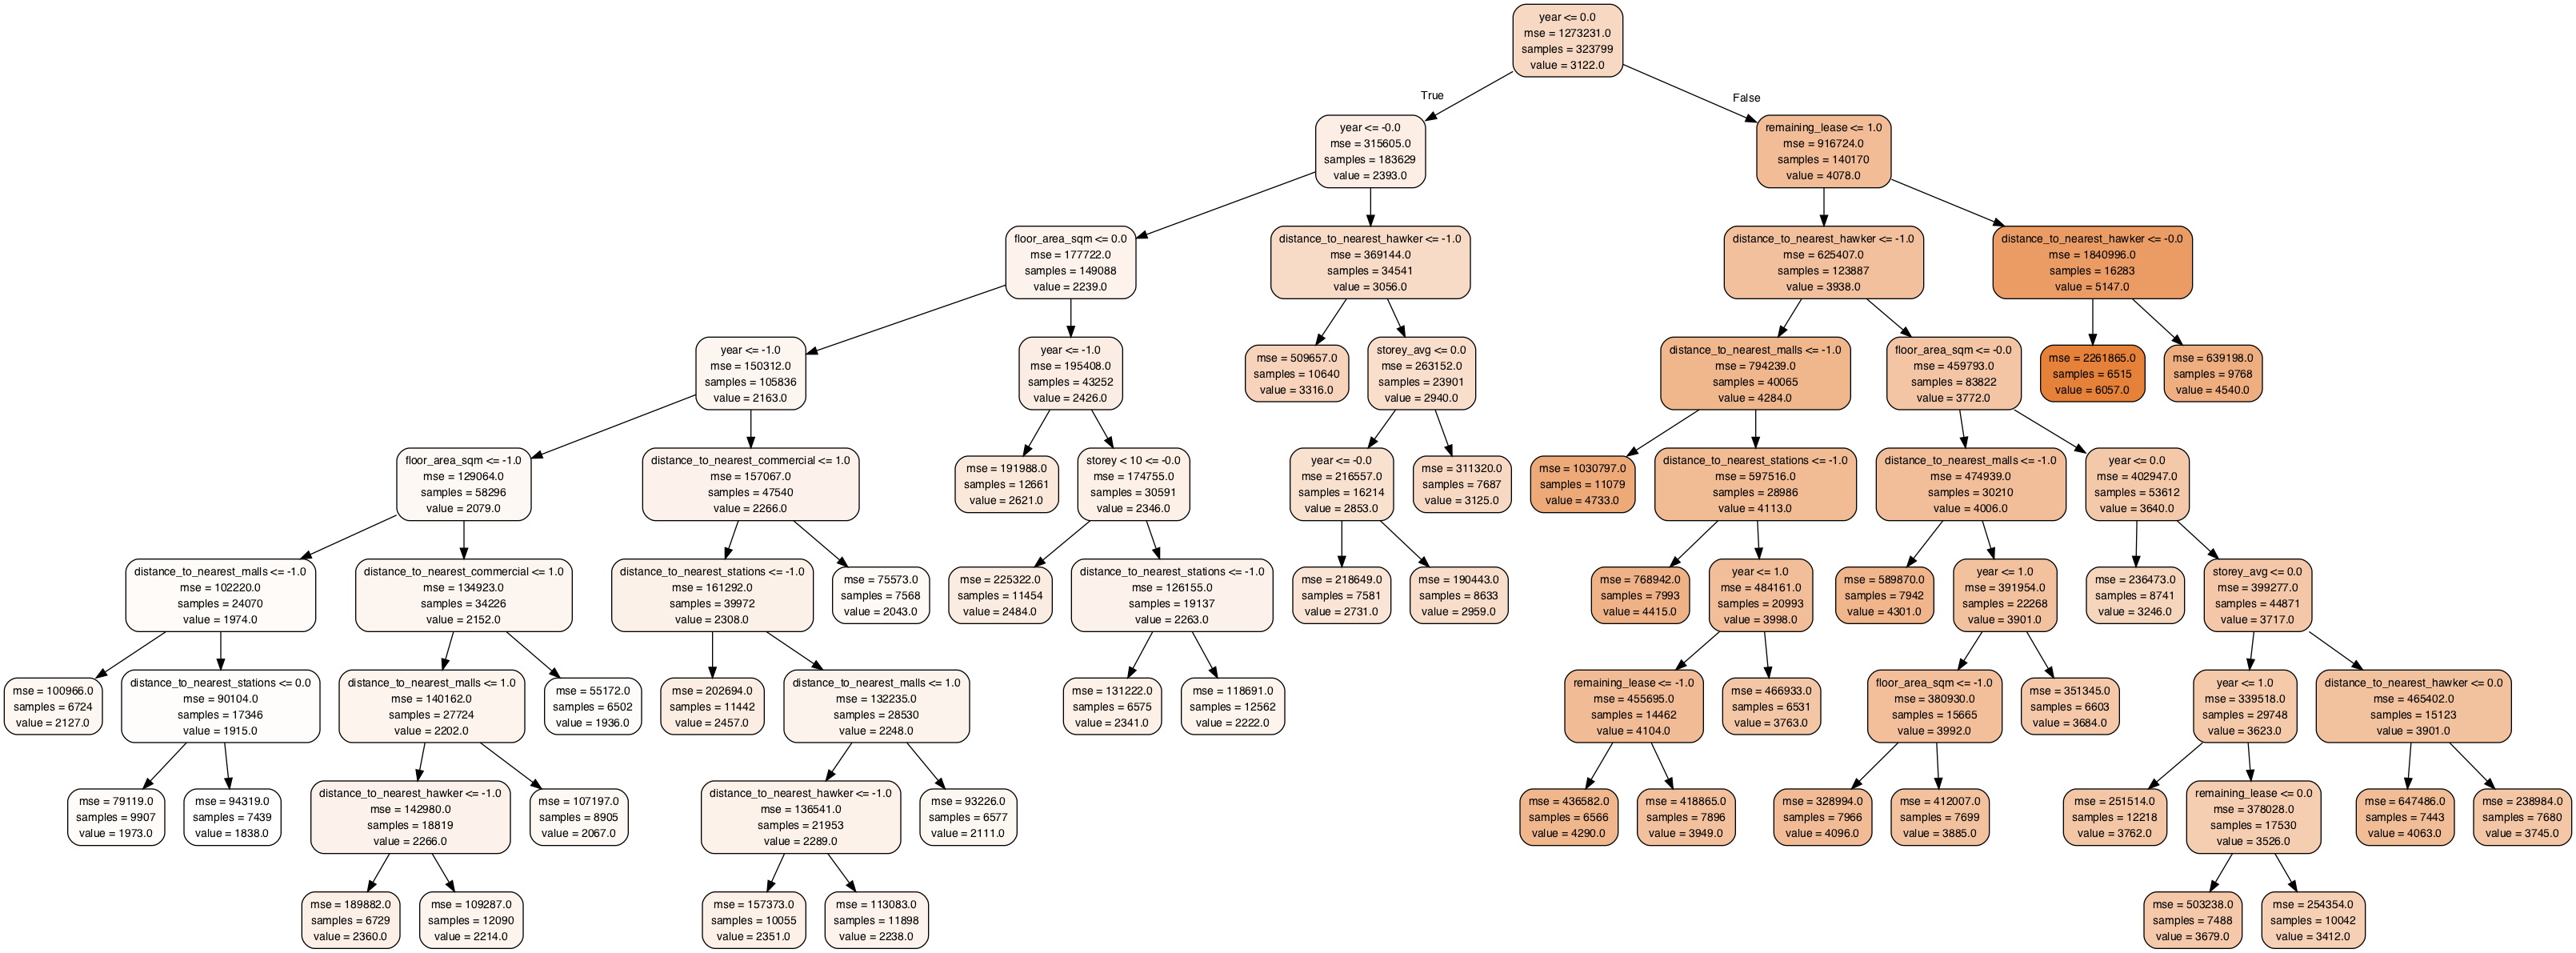

In [149]:
from sklearn import tree
import pydotplus
from IPython.display import Image  
import matplotlib as mpl
import matplotlib.pyplot as plt

dot_data = tree.export_graphviz(
    dt_model,feature_names = X.columns,
    out_file=None, filled=True,
    rounded=True, precision = 0
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png(), width = 2000)

In [150]:
yhat = dt_model.predict(X_tests)
print('-------------- XGB Model: Baseline Parameters ------------')
print('MAE: ' + str(mean_absolute_error(y_test, yhat)))
print('RMSE: '+ str(math.sqrt(mean_squared_error(y_test, yhat))))
print('R^2 Score: ' + str(r2_score(y_test, yhat)))

-------------- XGB Model: Baseline Parameters ------------
MAE: 409.5791661738332
RMSE: 584.2554806489308
R^2 Score: 0.7314261365799818
